# Reference 
https://www.kaggle.com/bittlingmayer/amazonreviews/home <br>
http://blog.conceptnet.io/posts/2017/how-to-make-a-racist-ai-without-really-trying/<br>
http://mlg.ucd.ie/datasets/bbc.html<br>
https://en.wikipedia.org/wiki/Sentiment_analysis<br>
https://machinelearningmastery.com/prepare-text-data-deep-learning-keras/<br>
https://skymind.ai/wiki/bagofwords-tf-idf<br>
https://www.tensorflow.org/tutorials/representation/word2vec<br>
https://skymind.ai/wiki/word2vec<br>
http://ruder.io/word-embeddings-1/<br>
Mikolov, T., Corrado, G., Chen, K., & Dean, J. (2013). Efficient Estimation of Word Representations in Vector Space. Proceedings of the International Conference on Learning Representations (ICLR 2013), 1–12. ↩︎

Mikolov, T., Chen, K., Corrado, G., & Dean, J. (2013). Distributed Representations of Words and Phrases and their Compositionality. NIPS, 1–9. ↩︎

# EMIS/CSE 8331: Data Mining, Spring 2019
# Hands on sentiment analysis 
## Present by Xingming Qu


# What is Sentiment Analysis

Sentiment analysis is ubiquitous, and it is a classification technique based on natural language processing. The main problem to be solved is to judge whether a sentence (or an article) is positive or negative. 
##  Why we need Sentiment Analysis
Dealing with sentiment analysis can greatly improve people's understanding of things, and can also use the conclusions of sentiment analysis to serve other people or things. 

---
For example, government can understand citizens' sentiment towards popular events. Therefore, they are able to grasp the public opinion orientation, and conduct public opinion monitoring in a timely and effective manner. 


## In this tutorial, we will mainly focus on
###  +Prepare Text Data for Deep Learning with Keras
    1. Tokenize Words 
    2. The feature of the document
    3. Word Embedding. 
        --Continuous Bag of Words Model (CBOW)
        --Skip-gram
    
### +Semantic analysis based on dictionary (old way).
### +Semantic analysis based on deep learning
    1. Sequence processing with RNN(LSTM) 
    2. Sequence processing with 1-d Convolution  

### OK! Let's start our tutorial!

In [7]:
from IPython.display import Image
from IPython.core.display import HTML 
from keras.models import Model, Sequential
from keras.layers import Dense, Embedding, Input, Conv1D, GlobalMaxPool1D, Dropout, concatenate, Layer, InputSpec, CuDNNLSTM
from keras.preprocessing import text, sequence
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K
from keras import activations, initializers, regularizers, constraints
from keras.utils.conv_utils import conv_output_length
from keras.regularizers import l2
from keras.constraints import maxnorm
import numpy as np
import pandas as pd
import os,shutil
import warnings
Image(url="https://images-na.ssl-images-amazon.com/images/I/41pih9cD1-L._SX355_.jpg", width=400, height=400)

# 1.Prepare Text Data for Deep Learning with Keras
## 1.1 Tokenize Words
Tokenization is a way to split text into tokens. These tokens could be paragraphs, sentences, individual words or even characters. 
Most of the time we use split text into words<br>
https://machinelearningmastery.com/prepare-text-data-deep-learning-keras/

In [8]:
docs = [' test Tokenize Words!',
        ' test This is the corpus~~~~~',
        'test Use Kears Tokenize?!@#',
        'test test test test...',
        '  ']

from keras.preprocessing.text import Tokenizer
t = Tokenizer()
# fit the tokenizer on the documents
t.fit_on_texts(docs)

In [9]:
# Once fit, the Tokenizer provides 4 attributes 
# that you can use to query what has been learned about your documents:
print(t.word_counts)  # A dictionary of words and their counts.
print(t.document_count) #  A dictionary of words and how many documents each appeared in.
print(t.word_index)  #  A dictionary of words and their uniquely assigned integers.
print(t.word_docs)  # An integer count of the total number of documents that were used to fit the Tokenizer.

OrderedDict([('test', 7), ('tokenize', 2), ('words', 1), ('this', 1), ('is', 1), ('the', 1), ('corpus', 1), ('use', 1), ('kears', 1)])
5
{'test': 1, 'tokenize': 2, 'words': 3, 'this': 4, 'is': 5, 'the': 6, 'corpus': 7, 'use': 8, 'kears': 9}
defaultdict(<class 'int'>, {'words': 1, 'test': 4, 'tokenize': 2, 'the': 1, 'is': 1, 'corpus': 1, 'this': 1, 'use': 1, 'kears': 1})


## 1.2. The feature of the document
### 1.2.1  bag-of-words feature
Bag of Words (BoW) is an algorithm that counts how many times a word appears in a document.BoW is a method for preparing text for input in a deep-learning net.

Each document --> vector 

In [10]:
docs = [' test Tokenize Words!',
        ' test This is the corpus~~~~~',
        'test Use Kears Tokenize?!@#',
        'test test test test...',
        '  ']

encoded_docs = t.texts_to_matrix(docs, mode='count')
print('test', 'tokenize', 'words', 'this' , 'is', 'the', 'corpus', 'use', 'kears')
print(encoded_docs)

test tokenize words this is the corpus use kears
[[0. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 1. 1. 1. 1. 0. 0.]
 [0. 1. 1. 0. 0. 0. 0. 0. 1. 1.]
 [0. 4. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


### 1.2.2  TF IDF  bag-of-words
Term-frequency-inverse document frequency (TF-IDF) is another way to judge the topic of an article by the words it contains. With TF-IDF, words are given weight – TF-IDF measures relevance, not frequency. That is, wordcounts are replaced with TF-IDF scores across the whole dataset.

<b>Higher weight means this word is more important.


In [11]:
Image(url= "https://skymind.ai/images/wiki/tfidf.png",width=400, height=400)

Example:

Consider a document containing 100 words wherein the word cat appears 3 times. The term frequency (i.e., tf) for cat is then (3 / 100) = 0.03. Now, assume we have 10 million documents and the word cat appears in one thousand of these. Then, the inverse document frequency (i.e., idf) is calculated as log(10,000,000 / 1,000) = 4. Thus, the Tf-idf weight is the product of these quantities: 0.03 * 4 = 0.12.

In [12]:
docs = [' test Tokenize Words!',
        ' test This is the corpus~~~~~',
        'test Use Kears Tokenize?!@#',
        'test test test test...',
        '  ']

encoded_docs = t.texts_to_matrix(docs, mode='tfidf')
print('           test', '    tokenize', '    words', '    this' , '    is', '    the', '    corpus', '    use', '    kears')
print(encoded_docs)

           test     tokenize     words     this     is     the     corpus     use     kears
[[0.         0.69314718 0.98082925 1.25276297 0.         0.
  0.         0.         0.         0.        ]
 [0.         0.69314718 0.         0.         1.25276297 1.25276297
  1.25276297 1.25276297 0.         0.        ]
 [0.         0.69314718 0.98082925 0.         0.         0.
  0.         0.         1.25276297 1.25276297]
 [0.         1.65405321 0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]]


## 1.3 Word Embedding.


Word embedding is one of the most popular representation of document vocabulary. It is capable of capturing context of a word in a document, semantic and syntactic similarity, relation with other words, etc.
<br><b> Word embeddings refer to dense representations of words in a low-dimensional vector space
    
### Why Learn Word Embeddings?

In [7]:
Image(url="https://www.tensorflow.org/images/audio-image-text.png", width=850)

Image and audio processing systems work with rich, high-dimensional datasets encoded as vectors of the individual raw pixel-intensities for image data, or e.g. power spectral density coefficients for audio data.
<b>However, natural language processing systems traditionally treat words as discrete atomic symbols

Vector space models (VSMs) represent (embed) words in a continuous vector space where semantically similar words are mapped to nearby points ('are embedded nearby each other').

### word2vec(most popular word embedding model): two-layer neural net that processes text
<b>Turns text into a numerical form that deep nets can understand

Word2vec is similar to an autoencoder, encoding each word in a vector, but rather than training against the input words through reconstruction, <b>word2vec trains words against other words that neighbor them in the input corpus.</b>
    
It does so in one of <b>two ways</b>, either using context to predict a target word (a method known as continuous bag of words, or CBOW), or using a word to predict a target context, which is called skip-gram. <b>In practice we usually use the latter method because it produces more accurate results on large datasets.

In [8]:
Image(url="https://skymind.ai/images/wiki/word2vec_diagrams.png", width=600)

Extent reading---CBOW VS Skip-gram: http://cs224d.stanford.edu/lecture_notes/notes1.pdf
<br>
Skip-gram https://medium.com/district-data-labs/forward-propagation-building-a-skip-gram-net-from-the-ground-up-9578814b221
<br>
Why Skip-gram works better than CBOW: https://stats.stackexchange.com/questions/180548/why-is-skip-gram-better-for-infrequent-words-than-cbow

### Continuous Bag of Words Model (CBOW): uses context to predict a target word 

Maximize the log probabilities of the target word given by the surrounding words.

$J_\theta = \frac{1}{T}\sum\limits_{t=1}^T\ \text{log} \space p(w_t \: | \: w_{t-n} , \cdots , w_{t-1}, w_{t+1}, \cdots , w_{t+n})$

In [4]:
Image(url="https://i.stack.imgur.com/NEbGx.png", width=350)

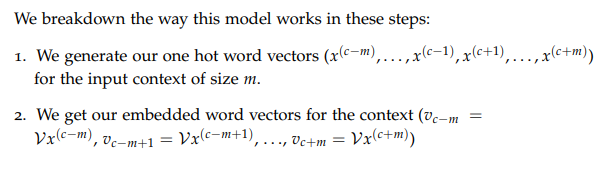

In [18]:
Image("img/c1.png")

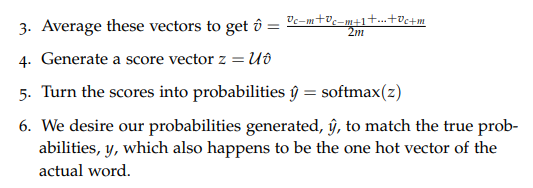

In [19]:
Image("img/c2.png")

### Skip-gram:uses the centre word to predict the surrounding words

objective thus sums the log probabilities of the surrounding 
n
 words to the left and to the right of the target word to produce the following objective:
 
$J_\theta = \frac{1}{T}\sum\limits_{t=1}^T\ \sum\limits_{-n \leq j \leq n , \neq 0} \text{log} \space p(w_{t+j} : | : w_t)$

In [9]:
Image(url="https://cdn-images-1.medium.com/max/800/0*xqhh7Gd64VAQ1Sny.png", width=550)

We must learn P and P' (through backpropagation  ). When we finish, <b>we call the P embedding matrix

####  Training Processing
Let's assume our context is +- 2.
1. We generate our one hot input vector $W(t)$
2. We get our embedded word vectors for the context $h=P W(t)$ 
3. We get $W(t-2)= hP' $
4. Turn each of the scores into probabilities, $\hat y = softmax(W(t-2))$
5. compare with ground truth and do backpropagation 
6. input vector $W(t)$ again and get $W(t-1)$<br>
.........


More tricks please read the original paper: https://papers.nips.cc/paper/5021-distributed-representations-of-words-and-phrases-and-their-compositionality.pdf

# visualization of word embedding

In [13]:
Image(url="https://www.tensorflow.org/images/linear-relationships.png", width=800)

We can visualize the learned vectors by projecting them down to 2 dimensions using for instance something like the t-SNE dimensionality reduction technique. When we inspect these visualizations it becomes apparent that the vectors capture some general, and in fact quite useful, semantic information about words and their relationships to one another!

# 2. Semantic analysis based on dictionary and the defect of word embedding

More detail please look at: http://blog.conceptnet.io/posts/2017/how-to-make-a-racist-ai-without-really-trying/ <br>
Let's make a sentiment classifier!

In [11]:
import numpy as np
import pandas as pd
import matplotlib
# import seaborn
import re
# import statsmodels.formula.api

from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

We talked about word2vec. But this time we try GloVe, pretrained on the Common Crawl of web pages.

We download glove.42B.300d.zip from [the GloVe web page](https://nlp.stanford.edu/projects/glove/), and extract it into `data/glove.42B.300d.txt`. Next we define a function to read the simple format of its word vectors.

In [12]:
def load_embeddings(filename):
    """
    Load a DataFrame from the generalized text format used by word2vec, GloVe,
    fastText, and ConceptNet Numberbatch. The main point where they differ is
    whether there is an initial line with the dimensions of the matrix.
    """
    labels = []
    rows = []
    with open(filename, encoding='utf-8') as infile:
        for i, line in enumerate(infile):
            items = line.rstrip().split(' ')
            if len(items) == 2:
                # This is a header row giving the shape of the matrix
                continue
            labels.append(items[0])
            values = np.array([float(x) for x in items[1:]], 'f')
            rows.append(values)
    
    arr = np.vstack(rows)
    return pd.DataFrame(arr, index=labels, dtype='f')

embeddings = load_embeddings('data/glove.42B.300d.txt')
embeddings.shape

(1917494, 300)

In [13]:
embeddings[100:115]

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
than,-0.055767,0.425620,-0.336340,-0.327000,0.117190,0.198120,-4.1393,0.259850,-0.053024,-0.338830,...,-0.005653,-0.339460,-0.171790,-0.230470,-0.061769,0.163950,-0.313470,0.079536,-0.237930,0.242820
good,-0.069254,0.376680,-0.169580,-0.274820,0.256670,-0.202930,-4.1122,0.025950,-0.270850,-0.870030,...,-0.484760,-0.333630,-0.075956,0.158270,0.294310,-0.074275,-0.289090,-0.220280,0.088971,-0.028352
>,0.360740,-0.008824,-0.177570,0.427730,0.316440,0.025076,-1.7662,0.022277,0.370260,-0.005604,...,0.226760,0.067057,-0.269530,-0.527230,-0.193380,-0.312780,-0.465250,-0.321170,0.311530,-0.430260
into,-0.117980,-0.008120,0.148950,-0.093395,0.058621,-0.305920,-4.1114,0.464410,-0.036579,-0.362530,...,-0.344060,-0.375920,-0.047337,-0.074423,0.091269,-0.072449,0.129580,0.025338,-0.199670,-0.219010
its,0.390660,0.257770,0.061747,-0.389770,-0.140780,-0.145800,-4.2649,0.699030,0.218570,-0.516560,...,-0.056945,-0.260470,-0.355600,-0.418730,-0.001772,0.551010,0.565260,-0.409770,0.178530,0.371000
these,0.102150,-0.016396,0.128250,-0.264650,-0.098437,0.251010,-4.4464,0.030793,-0.148130,-0.506990,...,-0.237990,0.007718,-0.323230,-0.532920,-0.039191,-0.520640,-0.328470,-0.251000,-0.044281,0.346960
us,-0.068327,-0.263170,0.084487,0.252090,0.033995,0.115390,-4.0259,-0.206360,0.104640,-0.075034,...,-0.257240,0.280800,0.254780,0.110570,0.064261,0.311320,0.106030,0.376860,0.245400,0.212040
see,0.133470,-0.154860,-0.505610,-0.311500,0.172940,-0.148110,-3.6309,0.077560,0.206970,-0.509020,...,-0.348500,0.130610,-0.113630,0.195610,-0.145860,-0.109620,-0.121570,0.129990,0.161610,0.261480
here,0.107040,0.082424,0.147940,-0.472210,0.512760,0.142310,-3.6893,0.089892,0.042046,-0.366300,...,-0.099222,0.226230,0.170110,-0.125930,-0.109300,0.033080,-0.266320,-0.074878,-0.301820,0.099069
make,-0.135860,-0.010829,-0.058323,-0.036282,-0.093387,0.352750,-4.3414,0.090579,0.003557,-0.622190,...,-0.252640,-0.167960,-0.274500,0.185840,0.320450,-0.272160,-0.038879,-0.174100,0.131380,-0.182270


We need some input about which words are positive and which words are negative.

We download the lexicon from Bing Liu's web site (https://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html#lexicon) and extract it into `data/positive-words.txt` and `data/negative-words.txt`.

Next we define how to read these files, and read them in as the `pos_words` and `neg_words` variables:

In [14]:
def load_lexicon(filename):
    """
    Load a file from Bing Liu's sentiment lexicon
    (https://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html), containing
    English words in Latin-1 encoding.
    
    One file contains a list of positive words, and the other contains
    a list of negative words. The files contain comment lines starting
    with ';' and blank lines, which should be skipped.
    """
    lexicon = []
    with open(filename, encoding='latin-1') as infile:
        for line in infile:
            line = line.rstrip()
            if line and not line.startswith(';'):
                lexicon.append(line)
    return lexicon

pos_words = load_lexicon('data/positive-words.txt')
neg_words = load_lexicon('data/negative-words.txt')

Now we get their embedding vector from embedding matrix

In [15]:
pos_vectors = embeddings.loc[pos_words].dropna()
neg_vectors = embeddings.loc[neg_words].dropna()

/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  """Entry point for launching an IPython kernel.
/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  


In [16]:
vectors = pd.concat([pos_vectors, neg_vectors])
targets = np.array([1 for entry in pos_vectors.index] + [-1 for entry in neg_vectors.index])

# we used 1 for positive words and -1 for negative words.
labels = list(pos_vectors.index) + list(neg_vectors.index)

In [17]:
# we have 6616 words
vectors.shape

(6629, 300)

Using the scikit-learn `train_test_split` function, we simultaneously separate the input vectors, output values, and labels into training and test data, with 10% of the data used for testing.

In [18]:
train_vectors, test_vectors, train_targets, test_targets, train_labels, test_labels = \
    train_test_split(vectors, targets, labels, test_size=0.1, random_state=0)

In [19]:
model = SGDClassifier(loss='log', random_state=0, n_iter=150)
model.fit(train_vectors, train_targets)
accuracy_score(model.predict(test_vectors), test_targets)

/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


0.951734539969834

Let's define a function that we can use to see the sentiment that this classifier predicts for particular words, then use it to see some examples of its predictions on the test data.

In [20]:
def vecs_to_sentiment(vecs):
    # predict_log_proba gives the log probability for each class
    predictions = model.predict_log_proba(vecs)

    # To see an overall positive vs. negative classification in one number,
    # we take the log probability of positive sentiment minus the log
    # probability of negative sentiment.
    return predictions[:, 1] - predictions[:, 0]


def words_to_sentiment(words):
    vecs = embeddings.loc[words].dropna()
    log_odds = vecs_to_sentiment(vecs)
    return pd.DataFrame({'sentiment': log_odds}, index=vecs.index)


# Show 20 examples from the test set
words_to_sentiment(test_labels).iloc[300:320]

,sentiment
sorry,-7.246184
skillful,8.177097
unneeded,-8.944128
egregiously,-11.235916
recommendation,4.215600
redemption,3.383527
clueless,-7.619405
dragging,-9.207261
confused,-10.024105
weirdly,-3.562341


More than the accuracy number, this convinces us that the classifier is working. We can see that the classifier has learned to generalize sentiment to words outside of its training data.

In [21]:
import re
TOKEN_RE = re.compile(r"\w.*?\b")
# The regex above finds tokens that start with a word-like character (\w), and continues
# matching characters (.+?) until the next word break (\b). It's a relatively simple
# expression that manages to extract something very much like words from text.


def text_to_sentiment(text):
    tokens = [token.casefold() for token in TOKEN_RE.findall(text)]
    sentiments = words_to_sentiment(tokens)
    return sentiments['sentiment'].mean()

We can average words sentiment score to get the sentiment.

In [22]:
text_to_sentiment("this example is brilliant")

4.975339786346103

In [23]:
text_to_sentiment("The weather is good today")

2.7899924404558565

In [24]:
text_to_sentiment("I love you")

3.637917481972254

In [25]:
text_to_sentiment("I hate you")

-2.6437121810799598

Seems like we got good results!......But what about the following exmample 

In [26]:
text_to_sentiment("The weather is not good today")

1.785023736165175

In [27]:
text_to_sentiment("This project is not perfect")

3.4577666389922053

Besides, this classifier also has strong bias!

In [28]:
text_to_sentiment("Let's go get Italian food")

1.3910905144976535

In [29]:
text_to_sentiment("Let's go get Chinese food")

0.7376801944107022

In [30]:
text_to_sentiment("Let's go get Mexican food")

-0.2526547728204318

Word embedding was greatly affected by the training data...and the traditional way to do sentiment analysis was not considering the content....
To deal with the first problem, we could use the new "ConceptNet"
http://www.conceptnet.io/

And the existing deep learning model like LSTM could capture the content

# 3.Semantic analysis based on deep learning
In this section, we will use the dataset from  https://www.kaggle.com/bittlingmayer/amazonreviews<br>

This dataset consists of a few million Amazon customer reviews (input text) and star ratings (0-negative   1 -positive) for learning how to train fastText for sentiment analysis.


Let's do a brief review about LSTM.  

http://colah.github.io/posts/2015-08-Understanding-LSTMs/

In [11]:
Image(url="http://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-chain.png", width=700)

In [10]:
Image(url="http://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM2-notation.png", width=600)

# Step-by-Step LSTM Walk Through

The key to LSTMs is <b> how to control the cell state</b>, the horizontal line running through the top of the diagram.


In [9]:
Image(url="http://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-C-line.png", width=600)

Here, the idea of LSTM is to use three gates to protect and control the cell state. It is a way to optionally let information through. They are composed out of a sigmoid neural net layer and a pointwise multiplication operation.


In [12]:
Image(url="http://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-gate.png", width=100)

The sigmoid layer outputs numbers between zero and one, describing how much of each component should be let through. A value of zero means “let nothing through,” while a value of one means “let everything through!”

The name of three gates are:<br>
forget gate<br>
input gate<br>
ourput gate<br>


In [16]:
Image(url="http://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-focus-f.png", width=800)

The first step in our LSTM is to decide what information we’re going to throw away from the cell state. This decision is made by a sigmoid layer called the “forget gate layer.” It looks at $h_{t−1}$ and $x_t$, and outputs a number between 0 and 1 for each number in the cell state $C_{t−1}$.  1 represents “completely keep this” while a 0 represents “completely get rid of this.”

In [17]:
Image(url="http://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-focus-i.png", width=800)

The next step is to decide what new information we’re going to store in the cell state. This has two parts.

First, a sigmoid layer called the “input gate layer” decides which values(or how much)  we’ll update.

Next, a tanh layer creates a vector of new candidate values, $\tilde{C}_t$, that could be added to the state. In the next step, we’ll combine these two to create an update to the state.

It’s now time to update the old cell state, $C_{t−1}$, into the new cell state $ C_t$. The previous steps already decided what to do, we just need to actually do it.

In [18]:
Image(url="http://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-focus-C.png", width=800)

This equation means: forgetting the things we decided to forget earlier:   $f_t * C_{t-1}$  <br>
plus<br>
the new candidate values, scaled by how much we decided to update each state value.  $ i_t *\tilde{C}_t $

In [19]:
Image(url="http://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-focus-o.png", width=800)

Finally, we need to decide what we’re going to output. This output will be based on our cell state, but will be a filtered version. First, we run a sigmoid layer which decides what parts of the cell state we’re going to output. Then, we put the cell state through tanh (to push the values to be between −1 and 1) and multiply it by the output of the sigmoid gate, so that we only output the parts we decided to.

After understand LSTM, we will a variants version called bidirectional LSTM.

In [21]:
Image(url="https://cdn-images-1.medium.com/max/800/1*GRQ91HNASB7MAJPTTlVvfw.jpeg", width=500)

In [53]:
from keras.models import Model, Sequential
from keras.layers import Dense, Embedding, Input, Conv1D, Activation,GlobalMaxPool1D, Dropout, concatenate, GlobalAveragePooling1D,Layer, InputSpec, CuDNNLSTM,BatchNormalization
from keras.preprocessing import text, sequence
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K
from keras import activations, initializers, regularizers, constraints
from keras.utils.conv_utils import conv_output_length
from keras.regularizers import l2
from keras.constraints import maxnorm
import numpy as np 
import pandas as pd 
import bz2
import gc
import chardet
import re
import os

In [32]:
train_file = bz2.BZ2File('data/train.ft.txt.bz2')
test_file = bz2.BZ2File('data/test.ft.txt.bz2')
train_file_lines = train_file.readlines()
test_file_lines = test_file.readlines()
del train_file, test_file

Convert from raw binary strings to strings that can be parsed

In [33]:
train_file_lines = [x.decode('utf-8') for x in train_file_lines]
test_file_lines = [x.decode('utf-8') for x in test_file_lines]

In [34]:
train_labels = [0 if x.split(' ')[0] == '__label__1' else 1 for x in train_file_lines]
train_sentences = [x.split(' ', 1)[1][:-1].lower() for x in train_file_lines]

for i in range(len(train_sentences)):
    train_sentences[i] = re.sub('\d','0',train_sentences[i])
    
test_labels = [0 if x.split(' ')[0] == '__label__1' else 1 for x in test_file_lines]
test_sentences = [x.split(' ', 1)[1][:-1].lower() for x in test_file_lines]

for i in range(len(test_sentences)):
    test_sentences[i] = re.sub('\d','0',test_sentences[i])
                                                       
for i in range(len(train_sentences)):
    if 'www.' in train_sentences[i] or 'http:' in train_sentences[i] or 'https:' in train_sentences[i] or '.com' in train_sentences[i]:
        train_sentences[i] = re.sub(r"([^ ]+(?<=\.[a-z]{3}))", "<url>", train_sentences[i])
        
for i in range(len(test_sentences)):
    if 'www.' in test_sentences[i] or 'http:' in test_sentences[i] or 'https:' in test_sentences[i] or '.com' in test_sentences[i]:
        test_sentences[i] = re.sub(r"([^ ]+(?<=\.[a-z]{3}))", "<url>", test_sentences[i])

In [35]:
del train_file_lines, test_file_lines

In [36]:
print('We have',len(train_sentences),'sentences in training set')
print('We have',len(test_sentences),'sentences in test set')

We have 3600000 sentences in training set
We have 400000 sentences in test set


In [37]:
# Creates a tokenizer, configured to only take into account the 1,0000 most common words
max_features = 10000
# Cuts off the text after this number of words (among the max_features most ommon words)
maxlen = 128
# we used glove embedding
embed_size = 300

In [38]:
tokenizer = text.Tokenizer(num_words=max_features)

In [39]:
tokenizer.fit_on_texts(train_sentences)
tokenized_train = tokenizer.texts_to_sequences(train_sentences)
#Turns the lists of integers into a 2D integer tensor of shape (samples, maxlen)
X_train = sequence.pad_sequences(tokenized_train, maxlen=maxlen)

In [40]:
tokenized_test = tokenizer.texts_to_sequences(test_sentences)
X_test = sequence.pad_sequences(tokenized_test, maxlen=maxlen)

In [41]:
# # save them to save time 
# np.save('X_train.npy', X_train)
# np.save('X_test.npy', X_test)

In [57]:
print(X_train.shape)
print(X_test.shape)

(3600000, 128)
(400000, 128)


In [43]:
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 1035526 unique tokens.


In [44]:
# X_train = np.load('X_train.npy')
# X_test = np.load('X_test.npy')
del embeddings

In [45]:
# EMBEDDING_FILE='data/glove.42B.300d.txt'

## Preparing the Embedding layer
https://blog.keras.io/using-pre-trained-word-embeddings-in-a-keras-model.html<br>
Next, we compute an index mapping words to known embeddings, by parsing the data dump of pre-trained embeddings:

In [46]:
# embeddings_index = {}
# f = open('data/glove.42B.300d.txt',encoding='utf-8')
# for line in f:
#     values = line.split()
#     word = values[0]
#     coefs = np.asarray(values[1:], dtype='float32')
#     embeddings_index[word] = coefs
# f.close()
# print('Found %s word vectors.' % len(embeddings_index))

In [47]:
# embeddings_index['apple'].shape

At this point we can leverage our embedding_index dictionary and our word_index to compute our embedding matrix:

In [81]:
EMBEDDING_DIM=64
# embedding_matrix = np.zeros((len(word_index) + 1, EMBEDDING_DIM))
# for word, i in word_index.items():
#     embedding_vector = embeddings_index.get(word)
#     if embedding_vector is not None:
#         # words not found in embedding index will be all-zeros.
#         embedding_matrix[i] = embedding_vector

# embedding_matrix.shape

We load this embedding matrix into an Embedding layer. Note that we set trainable=False to prevent the weights from being updated during training.

In [82]:
from keras.layers import Embedding,Bidirectional,LSTM

# embedding_layer = Embedding(len(word_index) + 1,
#                             EMBEDDING_DIM,
#                             weights=[embedding_matrix],
#                             input_length=maxlen,
#                             trainable=False)

In [88]:
def cudnnlstm_model(conv_layers = 2, max_dilation_rate = 3):
    inp = Input(shape=(maxlen, ))
    ########   load this embedding matrix
    x = Embedding(len(word_index) + 1,
                            EMBEDDING_DIM,
#                             weights=[embedding_matrix],
                            input_length=maxlen,
                            trainable=True   
                                  )(inp)
    x = BatchNormalization()(x)
        
    x = Bidirectional(CuDNNLSTM(512, return_sequences=True))(x)  
    x = BatchNormalization()(x)
    x =Bidirectional(CuDNNLSTM(256))(x)
    x = BatchNormalization()(x)

    x = Dense(128, activation="relu")(x)
    x = Dropout(0.5)(x)
    x = Dense(1, activation="sigmoid")(x)
    model = Model(inputs=inp, outputs=x)
    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['binary_accuracy'])

    return model

cudnnlstm_model = cudnnlstm_model()
cudnnlstm_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        (None, 128)               0         
_________________________________________________________________
embedding_13 (Embedding)     (None, 128, 64)           66273728  
_________________________________________________________________
batch_normalization_51 (Batc (None, 128, 64)           256       
_________________________________________________________________
bidirectional_3 (Bidirection (None, 128, 1024)         2367488   
_________________________________________________________________
batch_normalization_52 (Batc (None, 128, 1024)         4096      
_________________________________________________________________
bidirectional_4 (Bidirection (None, 512)               2625536   
_________________________________________________________________
batch_normalization_53 (Batc (None, 512)               2048      
__________

In [89]:
weight_path="early_weights.hdf5"
checkpoint = ModelCheckpoint(weight_path, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
early_stopping = EarlyStopping(monitor="val_loss", mode="min", patience=5)
callbacks = [checkpoint, early_stopping]

In [92]:
batch_size = 1024
epochs = 5

In [93]:
cudnnlstm_model.fit(X_train, train_labels, 
                    batch_size=batch_size, 
                    epochs=epochs, 
                    shuffle = True, validation_split=0.10, 
                    callbacks=callbacks)

Train on 3240000 samples, validate on 360000 samples
Epoch 1/5
3240000/3240000 [==============================] - 2415s 745us/step - loss: 0.1734 - binary_accuracy: 0.9333 - val_loss: 0.1468 - val_binary_accuracy: 0.9450

Epoch 00001: val_loss improved from inf to 0.14684, saving model to early_weights.hdf5
Epoch 2/5
3240000/3240000 [==============================] - 2416s 746us/step - loss: 0.1325 - binary_accuracy: 0.9515 - val_loss: 0.1298 - val_binary_accuracy: 0.9529

Epoch 00002: val_loss improved from 0.14684 to 0.12981, saving model to early_weights.hdf5
Epoch 3/5
3240000/3240000 [==============================] - 2416s 746us/step - loss: 0.1173 - binary_accuracy: 0.9578 - val_loss: 0.1220 - val_binary_accuracy: 0.9554

Epoch 00003: val_loss improved from 0.12981 to 0.12200, saving model to early_weights.hdf5
Epoch 4/5
3240000/3240000 [==============================] - 2416s 746us/step - loss: 0.1051 - binary_accuracy: 0.9627 - val_loss: 0.1232 - val_binary_accuracy: 0.9554

Ep

.....40 mins per Epoch

In [94]:
cudnnlstm_model.load_weights(weight_path)
score, acc = cudnnlstm_model.evaluate(X_test, test_labels, batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

400000/400000 [==============================] - 106s 266us/step
Test score: 0.12461265060424805
Test accuracy: 0.954320000038147


## Sequence processing with 1D-CNN

In [4]:
Image(url="https://cdn-images-1.medium.com/max/1600/1*aBN2Ir7y2E-t2AbekOtEIw.png", width=900)

In [75]:
input = Input(shape=(maxlen,))
net = Embedding(max_features, 64)(input)
net = Dropout(0.2)(net)
net = BatchNormalization()(net)

net = Conv1D(32, 7, padding='same', activation='relu')(net)
net = BatchNormalization()(net)
net = Conv1D(32, 3, padding='same', activation='relu')(net)
net = BatchNormalization()(net)
net = Conv1D(32, 3, padding='same', activation='relu')(net)
net = BatchNormalization()(net)
net = Conv1D(32, 3, padding='same', activation='relu')(net)
net = BatchNormalization()(net)

net = Conv1D(2, 1)(net)
net = GlobalAveragePooling1D()(net)
net = Dense(1, activation="sigmoid")(net)
output =net
model = Model(inputs = input, outputs = output)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        (None, 128)               0         
_________________________________________________________________
embedding_11 (Embedding)     (None, 128, 64)           640000    
_________________________________________________________________
dropout_11 (Dropout)         (None, 128, 64)           0         
_________________________________________________________________
batch_normalization_46 (Batc (None, 128, 64)           256       
_________________________________________________________________
conv1d_44 (Conv1D)           (None, 128, 32)           14368     
_________________________________________________________________
batch_normalization_47 (Batc (None, 128, 32)           128       
_________________________________________________________________
conv1d_45 (Conv1D)           (None, 128, 32)           3104      
__________

In [76]:
weight_path="cnn1d_weights.hdf5"
checkpoint = ModelCheckpoint(weight_path, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
early_stopping = EarlyStopping(monitor="val_loss", mode="min", patience=2)
callbacks = [checkpoint, early_stopping]

In [77]:
model.fit(X_train, train_labels, batch_size=2048, epochs=5, validation_split=0.1,callbacks=callbacks)

Train on 3240000 samples, validate on 360000 samples
Epoch 1/5
3240000/3240000 [==============================] - 75s 23us/step - loss: 0.1841 - acc: 0.9287 - val_loss: 0.1526 - val_acc: 0.9440

Epoch 00001: val_loss improved from inf to 0.15260, saving model to cnn1d_weights.hdf5
Epoch 2/5
3240000/3240000 [==============================] - 72s 22us/step - loss: 0.1488 - acc: 0.9451 - val_loss: 0.1482 - val_acc: 0.9456

Epoch 00002: val_loss improved from 0.15260 to 0.14817, saving model to cnn1d_weights.hdf5
Epoch 3/5
3240000/3240000 [==============================] - 72s 22us/step - loss: 0.1392 - acc: 0.9489 - val_loss: 0.1430 - val_acc: 0.9483

Epoch 00003: val_loss improved from 0.14817 to 0.14296, saving model to cnn1d_weights.hdf5
Epoch 4/5
3240000/3240000 [==============================] - 72s 22us/step - loss: 0.1328 - acc: 0.9516 - val_loss: 0.1429 - val_acc: 0.9480

Epoch 00004: val_loss improved from 0.14296 to 0.14289, saving model to cnn1d_weights.hdf5
Epoch 5/5
3240000/3

In [79]:
model.load_weights(weight_path)
score, acc = model.evaluate(X_test, test_labels, batch_size=1024)
print('Test score:', score)
print('Test accuracy:', acc)

400000/400000 [==============================] - 3s 8us/step
Test score: 0.1450945812368393
Test accuracy: 0.9470975


Using 1-D convolution, we achieve almost the same accuracy compared with LSTM (94.7% vs 95.4%). But the training time was reduced a lot! (2415/epoch vs 72s/epoch)